In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
movies = pd.read_csv('movie.csv')

In [3]:
movies.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
movies['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [5]:
movies = movies.rename(columns={'text':'review','label':'sentiment'})

In [6]:
movies.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
movies.duplicated().sum()

277

In [8]:
movies.drop_duplicates(keep='first',inplace=True)

In [9]:
movies.duplicated().sum()

0

In [10]:
movies.head()

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [11]:
movies['rev_length'] = movies['review'].apply(len)

In [12]:
movies['rev_words'] = movies['review'].apply(lambda x:len(x.split()))

In [13]:
movies['rev_sent'] = movies['review'].apply(lambda x: len(x.split('.')))

In [14]:
movies.head()

,review,sentiment,rev_length,rev_words,rev_sent
0,I grew up (b. 1965) watching and loving the Th...,0,874,151,18
1,"When I put this movie in my DVD player, and sa...",0,1811,326,17
2,Why do people who do not know what a particula...,0,983,184,7
3,Even though I have great interest in Biblical ...,0,351,69,6
4,Im a die hard Dads Army fan and nothing will e...,1,983,178,11


<AxesSubplot:xlabel='sentiment', ylabel='rev_length'>

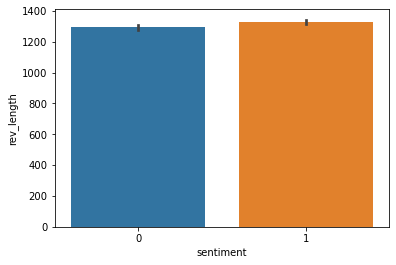

In [15]:
sns.barplot(x=movies['sentiment'],y = movies['rev_length'])

<AxesSubplot:xlabel='sentiment', ylabel='rev_words'>

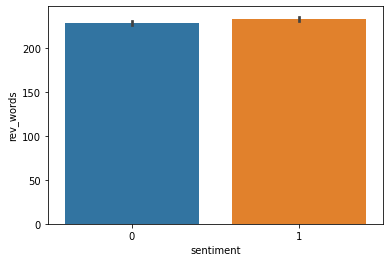

In [16]:
sns.barplot(x=movies['sentiment'],y = movies['rev_words'])

<AxesSubplot:xlabel='sentiment', ylabel='rev_sent'>

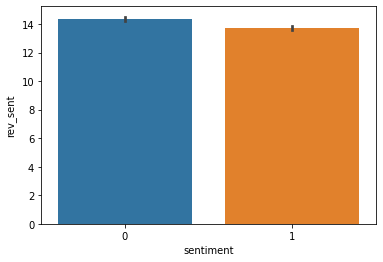

In [17]:
sns.barplot(x=movies['sentiment'],y = movies['rev_sent'])

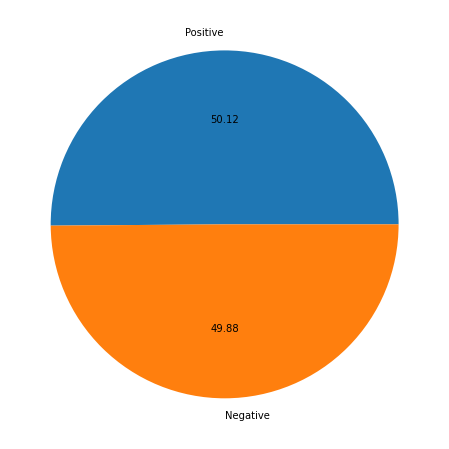

In [18]:
plt.figure(figsize=(8,8))
plt.pie(movies['sentiment'].value_counts(), labels=['Positive','Negative'],autopct='%.2f')
plt.show()

In [19]:
movies.shape

(39723, 5)

In [20]:
f = open('english_stopwords.txt')
stopwords = f.read()

In [156]:
# type(stopwords)

str

In [21]:
from bs4 import BeautifulSoup 
import string

In [22]:
def preprocessing(text):
    text = text.lower()
    soup = BeautifulSoup(text)
    text = soup.get_text()
    text = text.split()
    y = []
    for word in text:
        if word not in stopwords and word not in string.punctuation:
            y.append(word)
    return " ".join(y)

In [92]:
movies['review'] = movies['review'].apply(preprocessing)

In [95]:
movies.head()

,review,sentiment,rev_length,rev_words,rev_sent
0,grew (b. 1965) watching loving thunderbirds. m...,0,874,151,18
1,"movie dvd player, sat coke chips, expectations...",0,1811,326,17
2,people feel define others? replace woodstock c...,0,983,184,7
3,"great biblical movies, bored death minute movi...",0,351,69,6
4,"die dads army fan that. tapes, dvd's audiobook...",1,983,178,11


In [96]:
movies_df = movies.sample(15000)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [98]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## With CountVectorizer

In [114]:
cv = CountVectorizer(max_features=6000)

In [115]:
x = cv.fit_transform(movies_df['review']).toarray()

In [116]:
x.shape

(15000, 6000)

In [117]:
y = movies_df['sentiment']

In [118]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [119]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8303333333333334
[[1246  242]
 [ 267 1245]]
0.8372562205783457


In [105]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.836
[[1264  224]
 [ 268 1244]]
0.8474114441416893


In [120]:
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
ypred = bnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8353333333333334
[[1264  224]
 [ 270 1242]]
0.8472032742155525


## With TFDI Vectorizer

In [129]:
movies_df['rev_words'].sum()

3470219

In [191]:
tfidf = TfidfVectorizer(max_features=15000)

In [192]:
x = tfidf.fit_transform(movies_df['review']).toarray()

In [193]:
y = movies_df['sentiment']

In [194]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [195]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)
ypred = mnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8446666666666667
[[1270  218]
 [ 248 1264]]
0.8529014844804319


In [141]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8306666666666667
[[1255  233]
 [ 275 1237]]
0.8414965986394558


In [196]:
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
ypred = bnb.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8293333333333334
[[1288  200]
 [ 312 1200]]
0.8571428571428571


## Model selected = mnb
## Vectorizer = Tfidf 15000

In [197]:
import pickle
pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(tfidf,open("vectorizer.pkl","wb"))

In [200]:
movies['review'][1]

"movie dvd player, sat coke chips, expectations. hoping movie strong-points movie: awsome animation, good flowing story, excellent voice cast, funny comedy kick-ass soundtrack. disappointment, atlantis: milo's return. reviews down. paragraph directed movie, enjoyed points mentioned.when scene appears, shock picked atlantis: milo's return display-case local videoshop (or whatever), expectations had. music feels bad imitation movie, voice cast replaced fitting one. (with exception characters, voice sweet). drawings isnt bad, animation sad sight. storyline pretty weak, episodes schooby-doo single adventurous story time. dont misunderstand, good schooby-doo episodes. didnt laugh single sniggered twice.to audience movie, care sequel, fast review movie stand-alone product: schooby-doo, movie. enjoy movie do. suspect good kids movie, know. milo's return three-episode series cartoon channel, breakfast tv."

In [201]:
movies['sentiment'][1]

0